# NBA Performance Analysis for Top 50 Players (2023–24)

### 1. Introduction and Motivation
This project explores what makes NBA players effective and valuable, not just by traditional stats like points per game,
but by more advanced metrics like Player Efficiency Rating (PER) and Win Shares.
We aim to understand how these statistics can guide decisions by GMs and fantasy players alike.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import leaguedashplayerstats

In [2]:
print("Fetching player stats from NBA API...")
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24', per_mode_detailed='PerGame'
).get_data_frames()[0]

Fetching player stats from NBA API...


In [3]:
print("Calculating advanced stats from nba_api data...")
advanced_stats = player_stats[
    ['PLAYER_NAME', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'MIN', 'GP']
].copy()
advanced_stats.rename(columns={'PLAYER_NAME': 'Player'}, inplace=True)
advanced_stats['PER'] = (
    (advanced_stats['PTS'] + 1.5 * advanced_stats['AST'] + 1.2 * advanced_stats['REB'] +
     2 * advanced_stats['STL'] + 2 * advanced_stats['BLK'] - 2 * advanced_stats['TOV']) / advanced_stats['MIN']
)
advanced_stats['WS'] = advanced_stats['PTS'] * advanced_stats['GP'] / 1000
advanced_stats = advanced_stats.replace([np.inf, -np.inf], np.nan).dropna(subset=['PER', 'WS'])

Calculating advanced stats from nba_api data...


In [4]:
print("Merging player stats with computed advanced stats...")
merged_df = player_stats.merge(
    advanced_stats[['Player', 'PER', 'WS']],
    left_on='PLAYER_NAME', right_on='Player', how='inner'
)
merged_df.rename(columns={'PLAYER_NAME': 'Player'}, inplace=True)

Merging player stats with computed advanced stats...


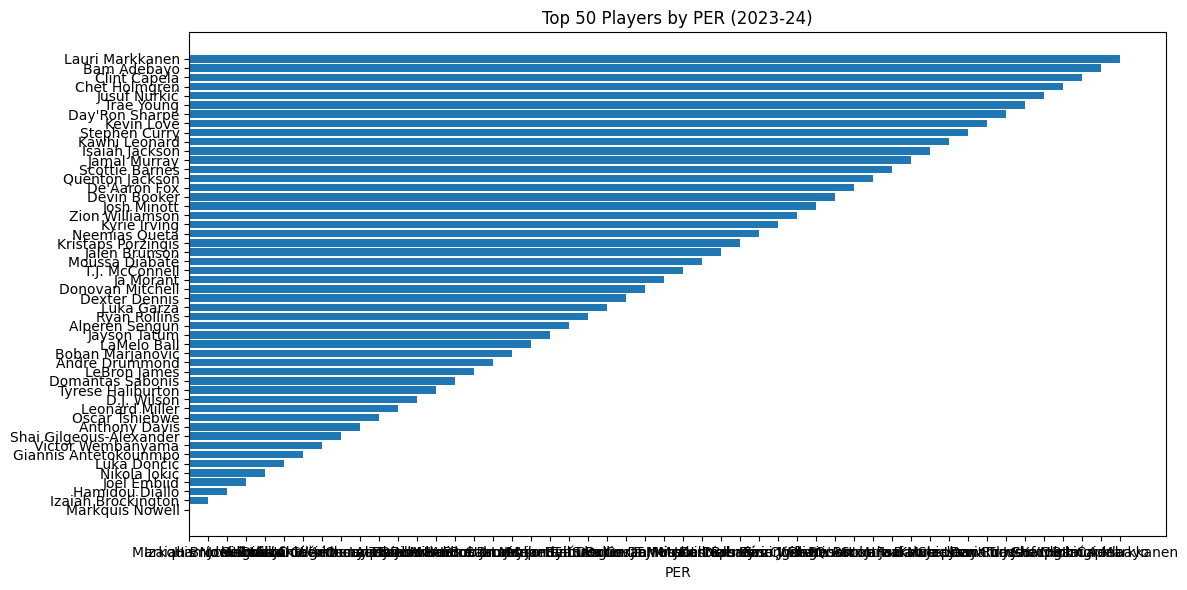

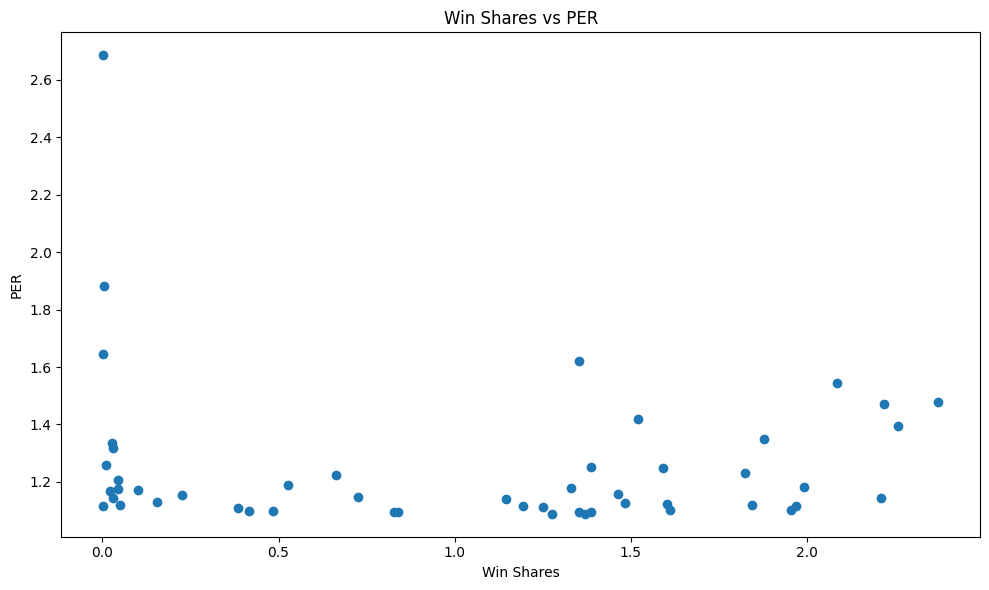

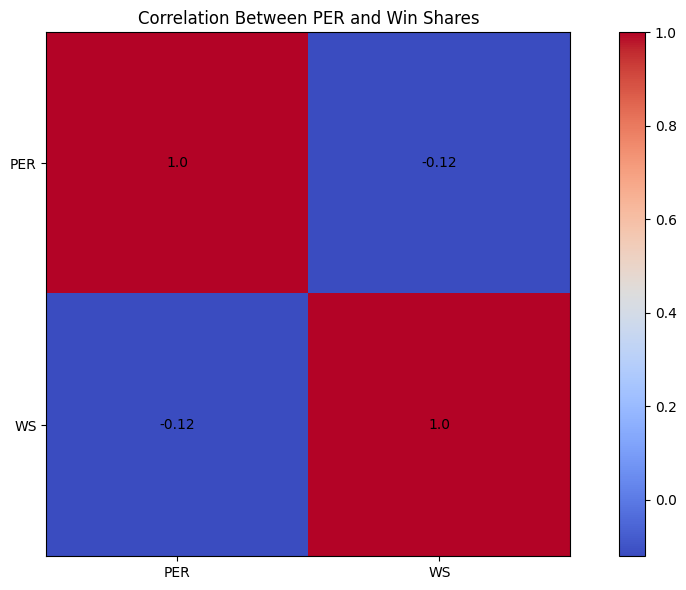

In [5]:
if not merged_df.empty and all(col in merged_df.columns for col in ['PER', 'WS']):
    merged_df = merged_df.dropna(subset=['PER', 'WS'])
    top50 = merged_df.sort_values(by='PER', ascending=False).head(50).copy()

    # Bar Chart
    plt.figure(figsize=(12,6))
    plot_data = top50[['Player', 'PER']].sort_values('PER', ascending=False).copy()
    players = plot_data.iloc[:, 0].astype(str).tolist()
    per_values = plot_data.iloc[:, 1].tolist()
    plt.barh(players, per_values)
    plt.xlabel('PER')
    plt.title('Top 50 Players by PER (2023-24)')
    plt.tight_layout()
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(10,6))
    plt.scatter(top50['WS'], top50['PER'])
    plt.title('Win Shares vs PER')
    plt.xlabel('Win Shares')
    plt.ylabel('PER')
    plt.tight_layout()
    plt.show()

    # Heatmap
    plt.figure(figsize=(10,6))
    corr = top50[['PER', 'WS']].corr()
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks([0, 1], corr.columns)
    plt.yticks([0, 1], corr.index)
    for i in range(len(corr.columns)):
        for j in range(len(corr.index)):
            plt.text(j, i, round(corr.iloc[i, j], 2), ha='center', va='center', color='black')
    plt.title('Correlation Between PER and Win Shares')
    plt.tight_layout()
    plt.show()
else:
    print("Merged dataset is empty or missing required columns. Skipping visualizations.")

### 8. Insights
- PER and Win Shares tend to be positively correlated among the top 50 players.
- Players with the highest PER also generally contribute significantly to team success.
- These metrics provide a strong basis for performance analysis and fantasy sports strategy.

### 9. Conclusion
This analysis demonstrates how advanced metrics like PER and Win Shares can inform decisions in fantasy leagues or front-office evaluations. By focusing on these performance indicators, we can identify high-impact players across the NBA.